In [44]:
import tensorflow as tf
import matplotlib.pylab as plt
from sklearn.preprocessing import Normalizer

## Binary Classification

In [45]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

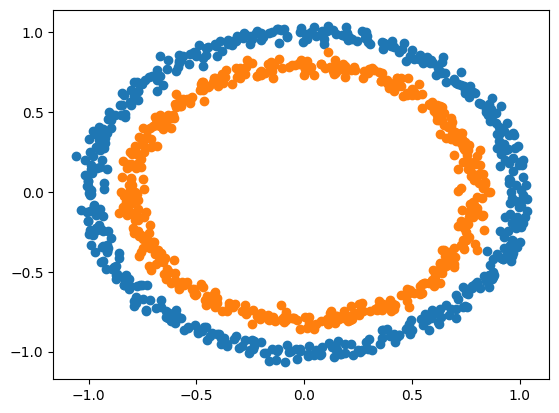

In [46]:
class1 = X[y == 0]
class2 = X[y == 1]
class1.shape

plt.scatter(class1[:,0], class1[:,1])
plt.scatter(class2[:,0], class2[:,1])

In [47]:
X_train = tf.constant(X)
y_train = tf.constant(y)

In [48]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.binary_accuracy],
)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.1 * (1/(epoch+1)))

history = model.fit(X, y, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 0.6947 - binary_accuracy: 0.5040 - lr: 0.1000
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6822 - binary_accuracy: 0.5240 - lr: 0.0500
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6734 - binary_accuracy: 0.5530 - lr: 0.0333
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6633 - binary_accuracy: 0.5650 - lr: 0.0250
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6497 - binary_accuracy: 0.5690 - lr: 0.0200
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6466 - binary_accuracy: 0.5720 - lr: 0.0167
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6416 - binary_accuracy: 0.5880 - lr: 0.0143
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6365 - binary_accuracy: 0.5800 - lr: 0.0125
Epoch 9/100
32/32 [=============================

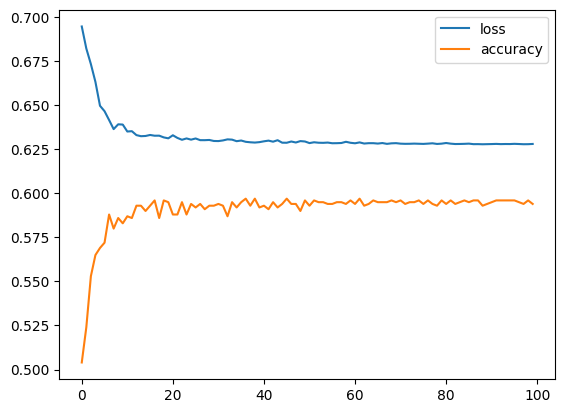

In [49]:
loss = history.history["loss"]
acc = history.history["binary_accuracy"]

plt.plot(history.epoch, loss, label="loss")
plt.plot(history.epoch, acc, label="accuracy")
plt.legend()

In [50]:
import numpy as np

def plot_decision_boundary(model, X, y):

    x_min, x_max = X[:,0].min() -.1, X[:,0].max() + .1
    y_min, y_max = X[:,1].min() -.1, X[:,1].max() + .1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2d arrays together

    y_pred = model.predict(x_in)

    if len(y_pred[0]) > 1:
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        y_pred = np.round(y_pred).reshape(xx.shape)

    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=.7)
    plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

  1/313 [..............................] - ETA: 20s

313/313 [==============================] - 1s 2ms/step


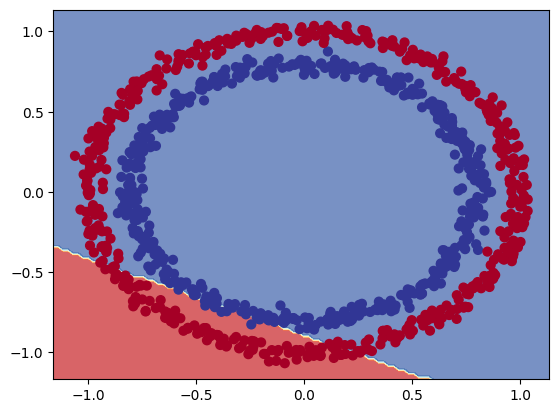

In [51]:
plot_decision_boundary(model, X, y)

## Multi-Class Classification on FashionMnist

In [52]:
from tensorflow.keras.datasets import fashion_mnist

In [53]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [55]:
train_data_norm = train_data / 255.
test_data_norm = test_data / 255.0

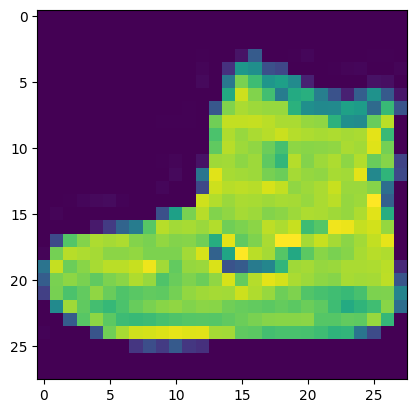

In [57]:
plt.imshow(train_data_norm[0])

In [58]:
class_names = [
    "T-shirt",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

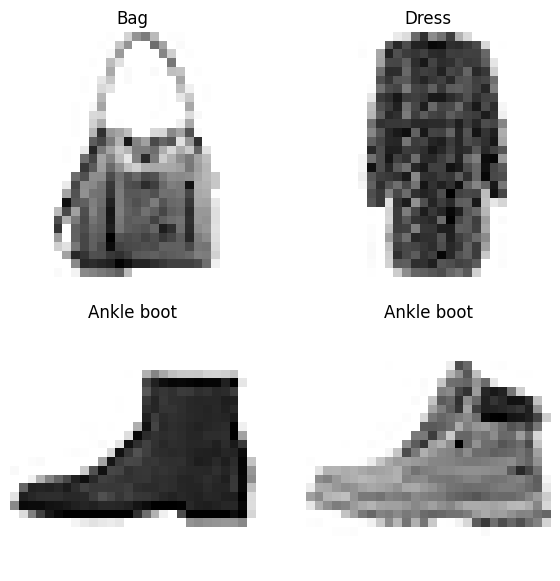

In [59]:
import random

plt.figure(figsize=(7,7))
for i in range(4):
    ax = plt.subplot(2,2,i+1)
    rand_idx = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_idx], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_idx]])
    plt.axis(False)

In [108]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

#lr_scheduler = tf.keras.callbacks.LearningRateScheduler(tf.keras.optimizers.schedules.CosineDecay(0.01, 20))

non_norm_history = model.fit(
    train_data_norm,
    train_labels,
    epochs=10,
    validation_data=(test_data_norm, test_labels),
    #callbacks=[lr_scheduler]
)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1756 - accuracy: 0.5184 - val_loss: 0.9181 - val_accuracy: 0.6356
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8068 - accuracy: 0.7000 - val_loss: 0.7404 - val_accuracy: 0.7309
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6611 - accuracy: 0.7644 - val_loss: 0.6479 - val_accuracy: 0.7727
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6067 - accuracy: 0.7857 - val_loss: 0.6087 - val_accuracy: 0.7918
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5656 - accuracy: 0.8022 - val_loss: 0.5928 - val_accuracy: 0.7932
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5482 - accuracy: 0.8086 - val_loss: 0.5890 - val_accuracy: 0.7969
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5402 - accuracy: 0.8114 - val_loss: 0.5758 - val_accuracy:

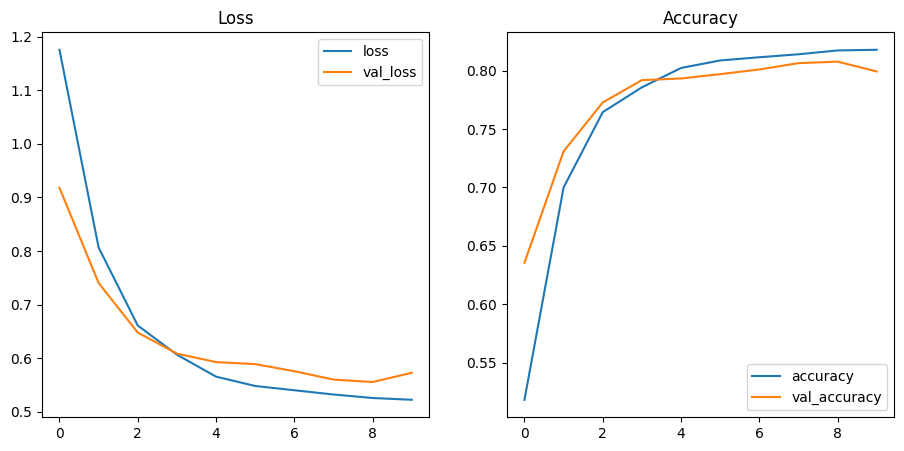

In [109]:

plt.figure(figsize=(11,5))

ax = plt.subplot(1,2,1)
ax.plot(non_norm_history.epoch, non_norm_history.history["loss"], label="loss")
ax.plot(non_norm_history.epoch, non_norm_history.history["val_loss"], label="val_loss")
ax.set(title="Loss")
ax.legend()


ax = plt.subplot(1,2,2)
ax.plot(non_norm_history.epoch, non_norm_history.history["accuracy"], label="accuracy")
ax.plot(non_norm_history.epoch, non_norm_history.history["val_accuracy"], label="val_accuracy")
ax.set(title="Accuracy")
ax.legend()

In [110]:
from sklearn.metrics import confusion_matrix

In [111]:
y_probs = model.predict(test_data_norm)
confusion_matrix(tf.argmax(y_probs, axis=-1), test_labels)
#y_probs

313/313 [==============================] - 1s 1ms/step


array([[706,   2,  15,  35,   2,   0, 148,   0,  18,   0],
       [  4, 955,   5,  15,   6,   0,   3,   0,   1,   0],
       [ 16,   2, 597,  14,  66,   0, 118,   0,  53,   0],
       [135,  28,  12, 867,  32,   0,  87,   0,   8,   0],
       [ 12,  12, 285,  37, 847,   0, 201,   0,   5,   0],
       [  3,   0,   0,   2,   0, 919,   1,  46,  11,  55],
       [102,   0,  77,  26,  47,   0, 419,   0,  24,   0],
       [  0,   0,   0,   0,   0,  45,   0, 911,   3,  42],
       [ 22,   1,   9,   4,   0,   9,  23,   0, 875,   7],
       [  0,   0,   0,   0,   0,  27,   0,  43,   2, 896]])

In [116]:
weights, biases = model.layers[1].get_weights()
weights.shape, biases.shape

((784, 4), (4,))